# Installing the package

In [ ]:
!pip install git+git://github.com/Shopify/visualization-tools.git

# Loading required package

In [1]:
from funnel_tree_vis.funnel_viz import *
from IPython.display import Image
from __future__ import division

# Creating the Panda DataFrame

In [2]:
df = pd.read_csv('example_talk.csv')
df

,Impression Status,Click Status,Number_of_users,Number_of_conversions
0,At least one Impression,At least one Ad Click,10000,1000
1,At least one Impression,No Ad Click,100000,5000
2,No Impression,At least one Ad Click,1000,90
3,No Impression,No Ad Click,300000,100


# Creating the tree without edge label
- Automatic selection of variable when not specified:
  - Number = Metric
  - String = Node

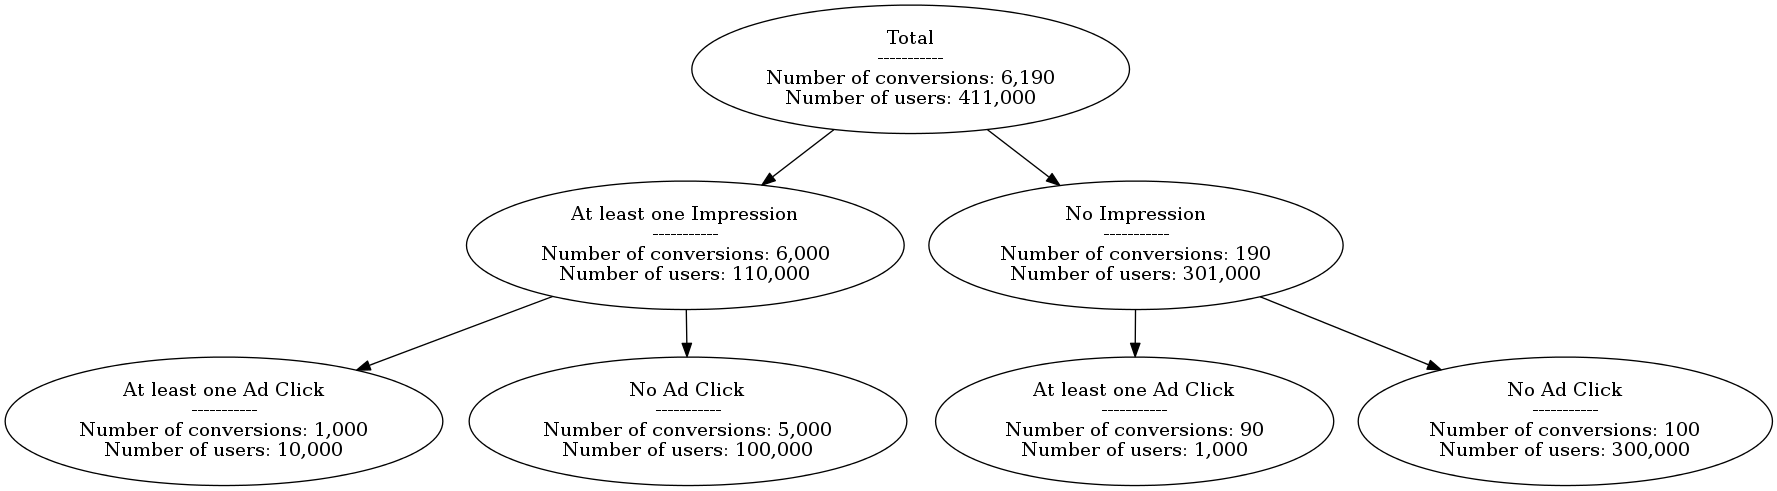

In [3]:
tree = TreeViz(df)
dot_program = tree.plot_tree(filepath="tbd.png")
Image(filename='tbd.png')

# Adding edge label

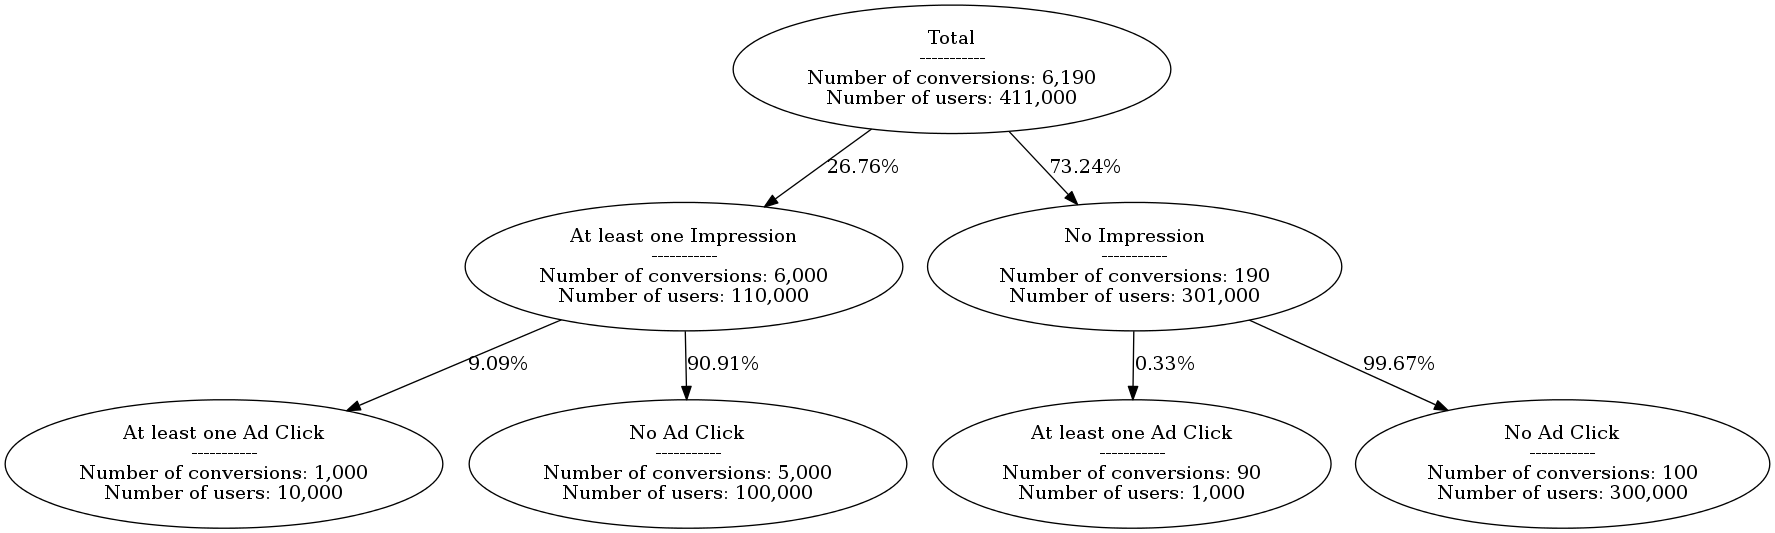

In [4]:
dot_program = tree.plot_tree(filepath="tbd.png", edge_prop_metric="Number_of_users")
Image(filename='tbd.png')

# Adding new metric

In [5]:
def conversion_rate_func(node):
    return node.Number_of_conversions/node.Number_of_users

tree.add_calculation({'Conversion_Rate': conversion_rate_func})


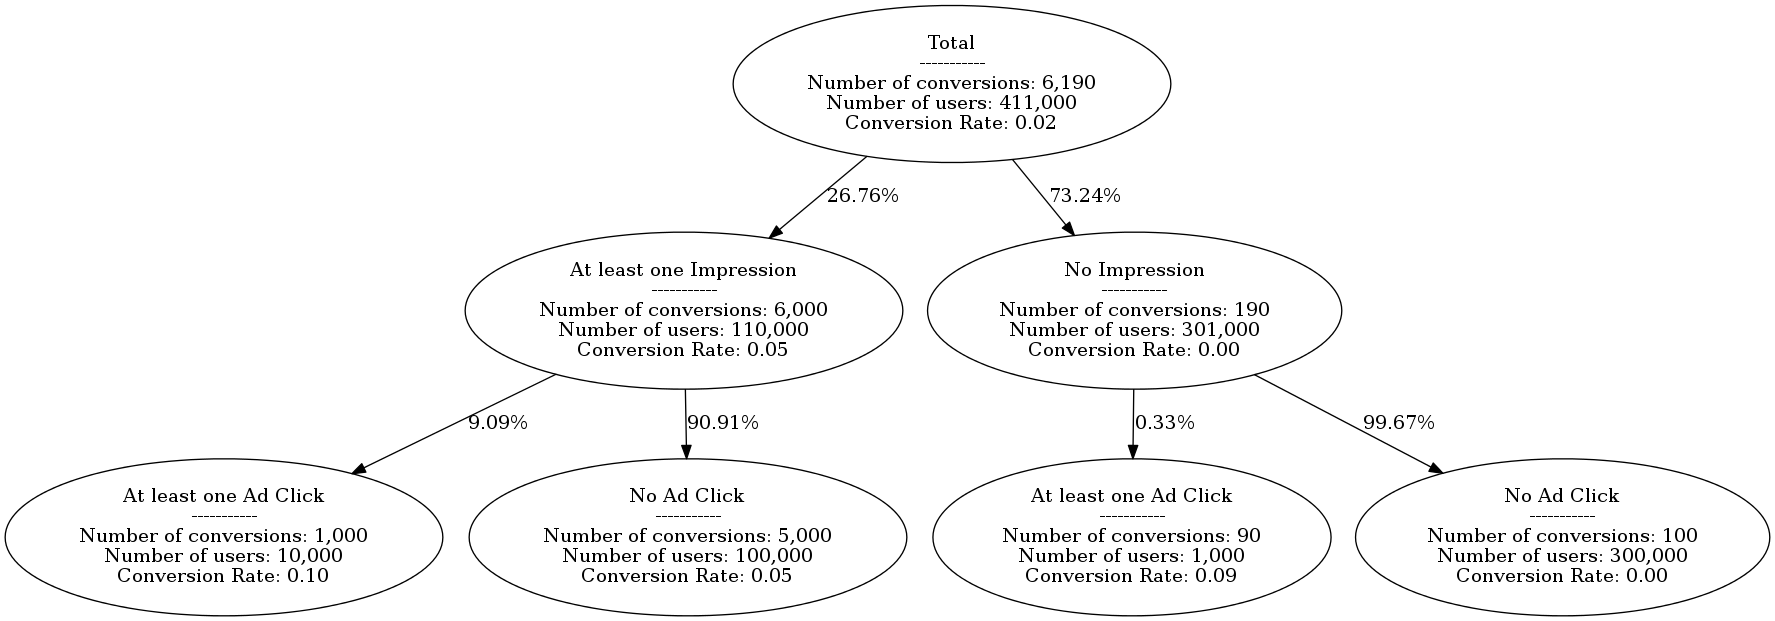

In [6]:
dot_program = tree.plot_tree(filepath="tbd.png", edge_prop_metric="Number_of_users")
Image(filename='tbd.png')

# Conversion is float, we can change it to percent

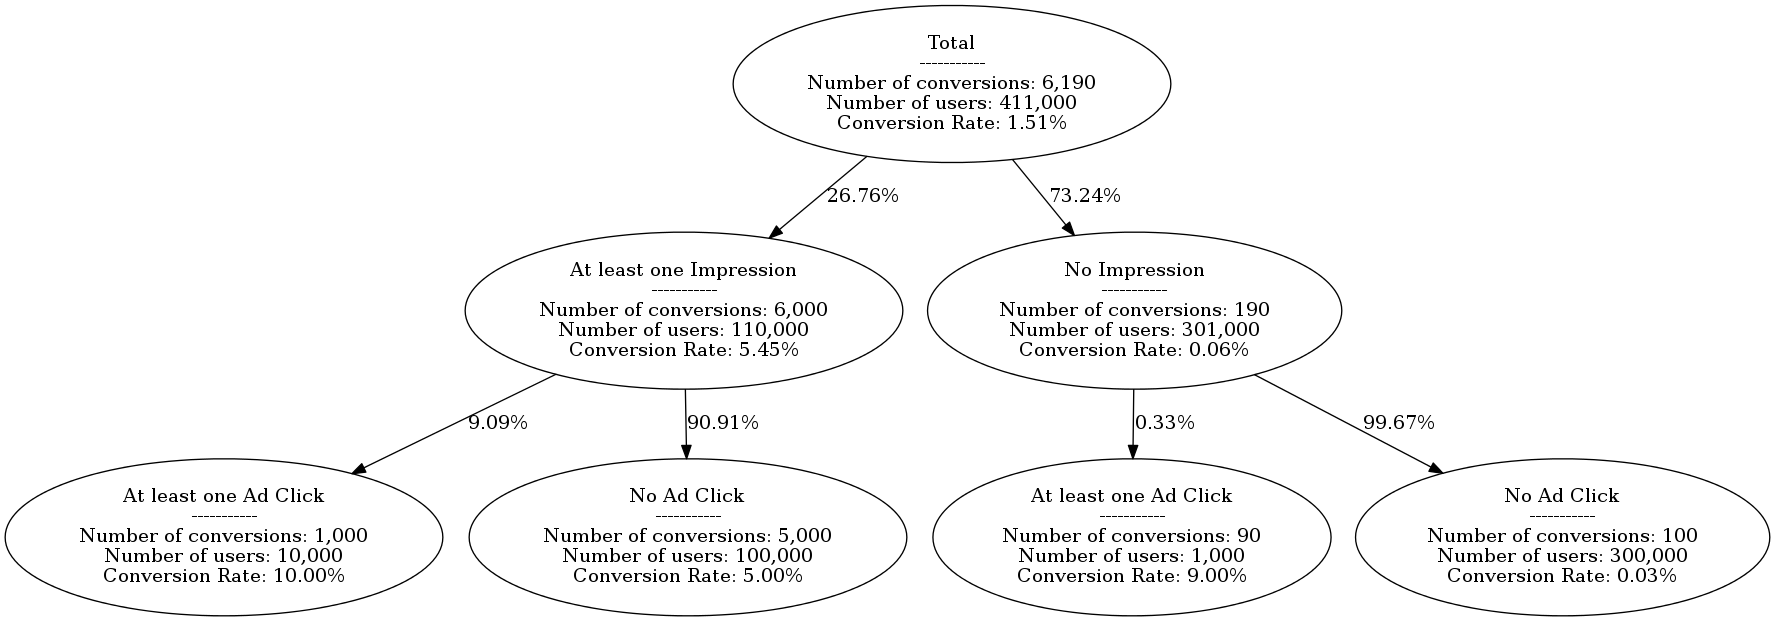

In [8]:
node_metric_col_print_dict = {
                              'Number_of_conversions':{'type':'int', 'digits':0},
                              'Number_of_users':{'type':'int', 'digits':0},
                              'Conversion_Rate':{'type':'percent', 'digits':2}
                              }
tree.update_node_metric_col_print_dict(node_metric_col_print_dict)

dot_program = tree.plot_tree(filepath="tbd.png", edge_prop_metric="Number_of_users")
Image(filename='tbd.png')

# Changing the aggregation

In [9]:
df

,Impression Status,Click Status,Number_of_users,Number_of_conversions
0,At least one Impression,At least one Ad Click,10000,1000
1,At least one Impression,No Ad Click,100000,5000
2,No Impression,At least one Ad Click,1000,90
3,No Impression,No Ad Click,300000,100


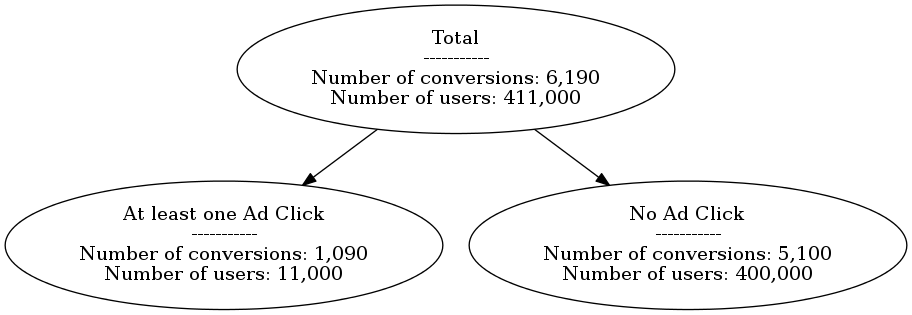

In [10]:
tree = TreeViz(df, node_level_list=['Click Status'])
dot_program = tree.plot_tree(filepath="tbd.png")
Image(filename='tbd.png')

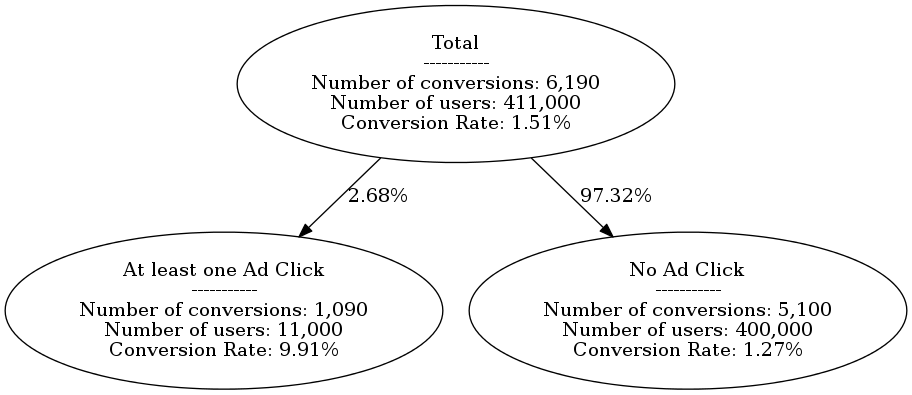

In [12]:
tree.add_calculation({'Conversion_Rate': conversion_rate_func})
tree.update_node_metric_col_print_dict(node_metric_col_print_dict)

dot_program = tree.plot_tree(filepath="tbd.png", edge_prop_metric="Number_of_users")
Image(filename='tbd.png')